# 📊 Confidence Journal EDA
This notebook performs exploratory data analysis (EDA) on the Week 1–2 dataset.

**Contents:**
1. Dataset overview and label distribution
2. Text length analysis
3. Most common words per class
4. Word clouds
5. TF‑IDF 2D scatter visualization (class separability)


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
CSV_PATH = Path("confidence_journal_week1-2.csv")
assert CSV_PATH.exists(), 'CSV dataset not found!'
df = pd.read_csv(CSV_PATH)
df.head()

,text,label
0,I kept rewriting the email because I was worri...,0
1,I froze during the stand‑up and stumbled over ...,0
2,I’m second‑guessing the whole plan; maybe I to...,0
3,I felt small in that conversation and didn’t s...,0
4,I looked at the to‑do list and felt like I’ll ...,0


C:\Users\earne\AppData\Local\Temp\ipykernel_19620\230649809.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')


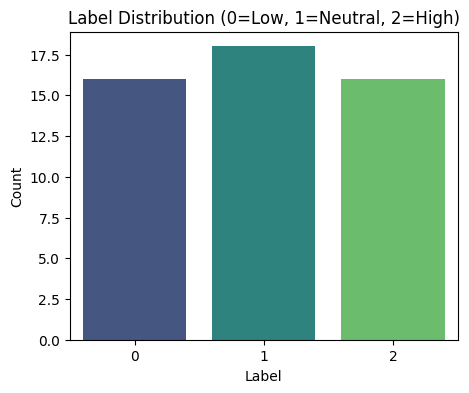

label
0    16
1    18
2    16
Name: count, dtype: int64

In [ ]:
# Label distribution
label_counts = df['label'].value_counts().sort_index()
plt.figure(figsize=(5,4))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.title('Label Distribution (0=Low, 1=Neutral, 2=High)')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()
label_counts

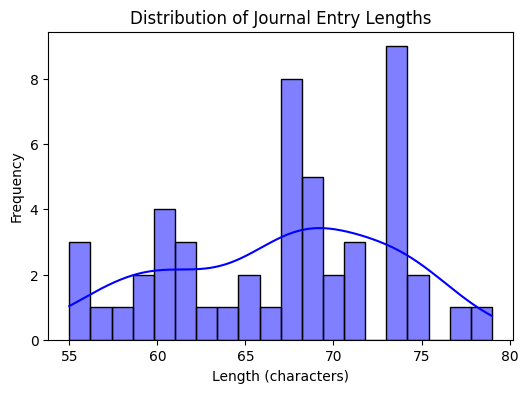

count    50.00000
mean     67.10000
std       6.22454
min      55.00000
25%      61.25000
50%      68.00000
75%      72.50000
max      79.00000
Name: length, dtype: float64

In [ ]:
# Text length analysis
df['length'] = df['text'].apply(len)
plt.figure(figsize=(6,4))
sns.histplot(df['length'], bins=20, kde=True, color='blue')
plt.title('Distribution of Journal Entry Lengths')
plt.xlabel('Length (characters)')
plt.ylabel('Frequency')
plt.show()
df['length'].describe()

In [ ]:
# Most common words per class
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

def top_words_for_label(label, n=15):
    texts = df[df['label']==label]['text']
    vec = CountVectorizer(stop_words='english')
    X = vec.fit_transform(texts)
    freqs = np.array(X.sum(axis=0)).flatten()
    words = vec.get_feature_names_out()
    top_idx = freqs.argsort()[::-1][:n]
    return list(zip(words[top_idx], freqs[top_idx]))

for lbl, name in zip([0,1,2], ['Low','Neutral','High']):
    print(f'\nTop words for {name} confidence:')
    for w,c in top_words_for_label(lbl):
        print(f'{w}: {c}')


Top words for Low confidence:
felt: 5
ll: 3
like: 3
didn: 3
wrong: 2
worried: 2
kept: 2
update: 1
topics: 1
took: 1
workout: 1
wish: 1
week: 1
voice: 1
verse: 1

Top words for Neutral confidence:
tomorrow: 3
set: 2
went: 2
questions: 2
practiced: 2
rest: 2
later: 2
finished: 2
draft: 2
worked: 1
week: 1
tonight: 1
took: 1
ups: 1
walk: 1

Top words for High confidence:
felt: 3
new: 2
asked: 2
woke: 1
workout: 1
work: 1
tracing: 1
teammates: 1
tall: 1
study: 1
strong: 1
weeks: 1
verse: 1
validated: 1
solved: 1


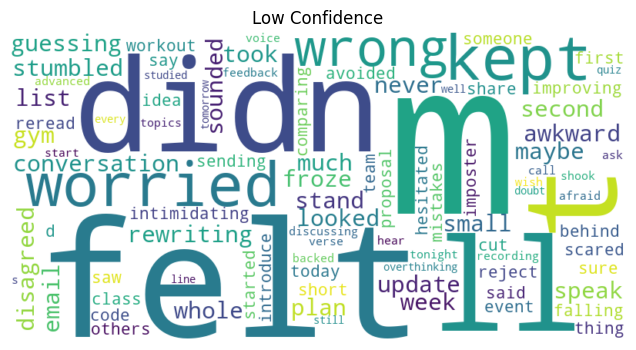

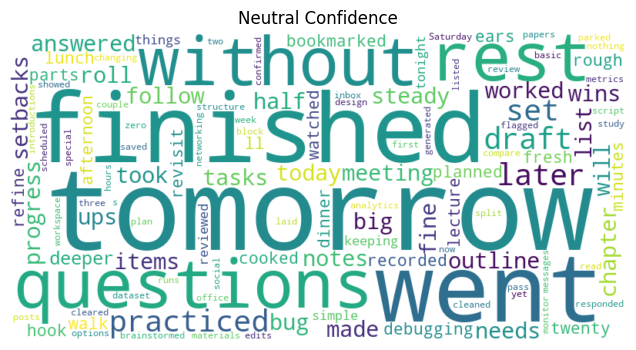

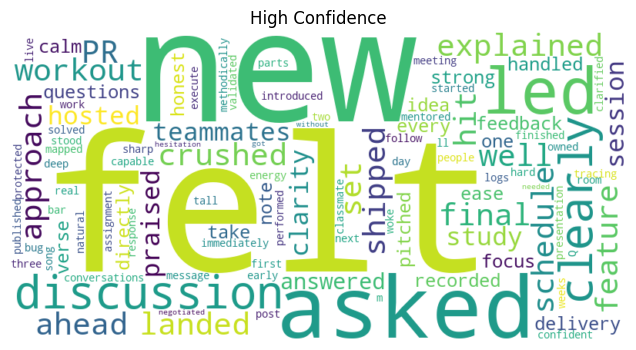

In [ ]:
# Word clouds per class
from wordcloud import WordCloud, STOPWORDS

custom_stops = set(STOPWORDS)  
for lbl, title in zip([0,1,2], ['Low Confidence','Neutral Confidence','High Confidence']):
    text_data = " ".join(df[df['label']==lbl]['text'])
    wc = WordCloud(width=800, height=400, background_color="white", stopwords=custom_stops).generate(text_data)
    plt.figure(figsize=(8,4))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()


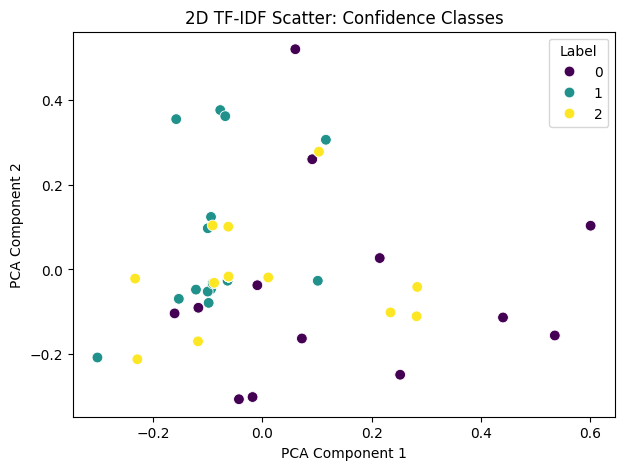

In [ ]:
# TF‑IDF 2D scatter visualization
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

tfidf = TfidfVectorizer(stop_words='english', max_features=500)
X_tfidf = tfidf.fit_transform(df['text'])

pca = PCA(n_components=2, random_state=42)
X_2d = pca.fit_transform(X_tfidf.toarray())

plt.figure(figsize=(7,5))
sns.scatterplot(x=X_2d[:,0], y=X_2d[:,1], hue=df['label'], palette='viridis', s=60)
plt.title('2D TF‑IDF Scatter: Confidence Classes')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Label')
plt.savefig("my_week1-2_plot.png", dpi=300, bbox_inches="tight")
plt.show()

